In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1.49919836667


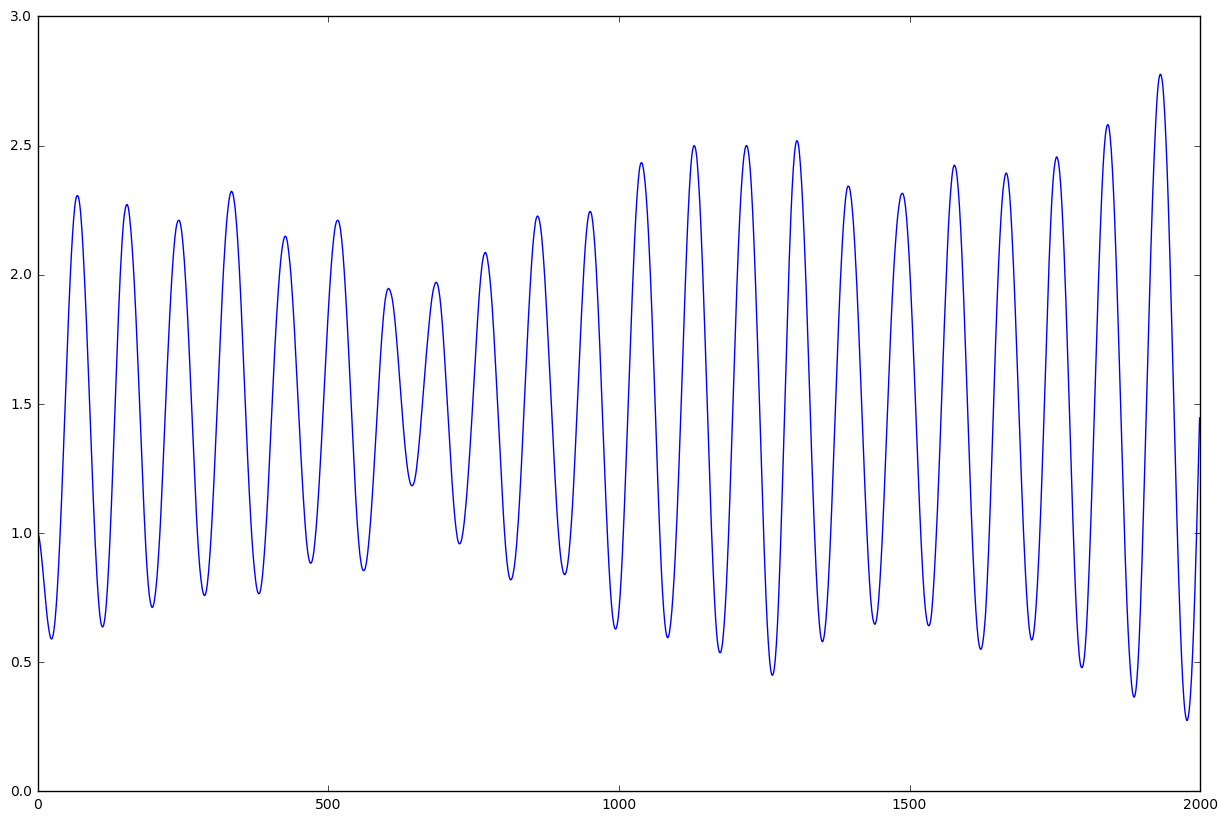

In [22]:
data = np.loadtxt(file("numbers").readlines()[5:])
print np.mean(data[500:,1])
plt.plot(data[:,1])

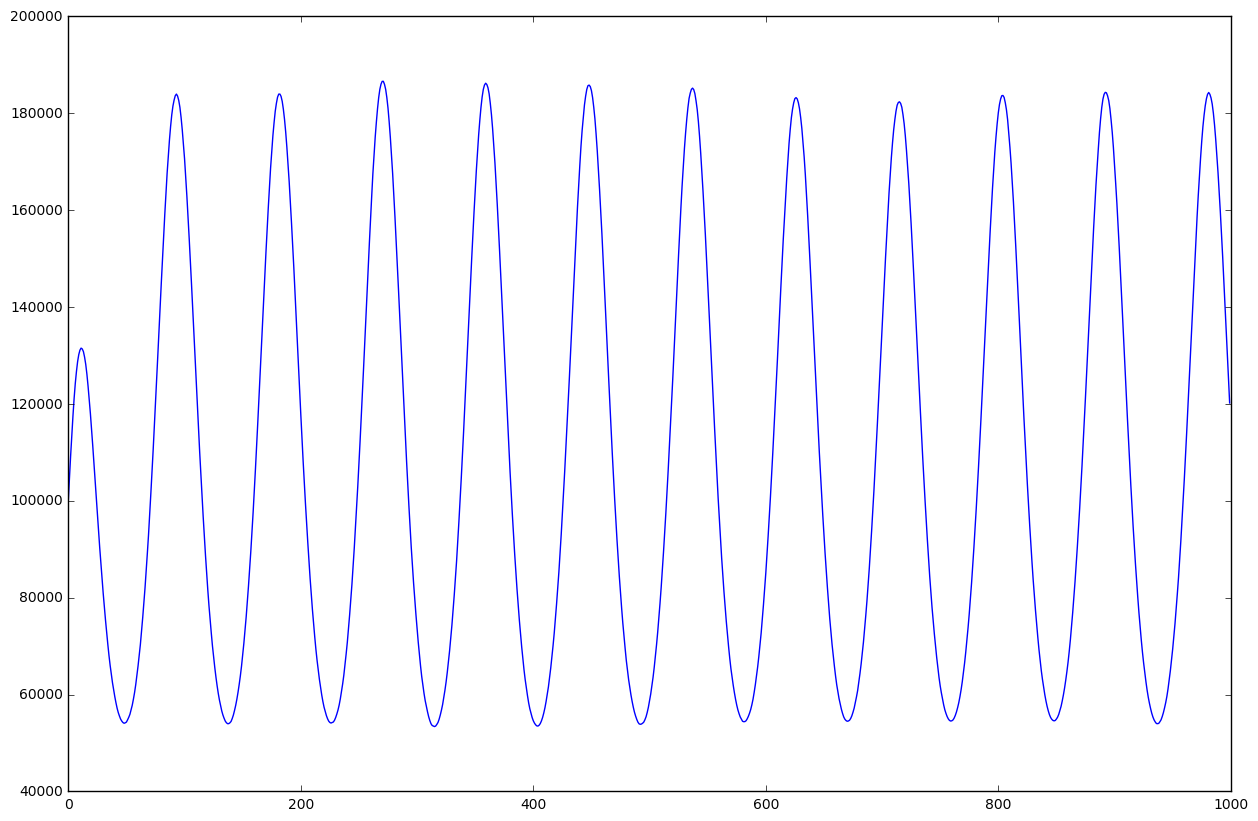

In [19]:
plt.plot(data[:,0])

In [9]:
def plot_energies(filename):
    lines = file(filename).readlines()
    try:
        data = np.loadtxt(lines)
    except ValueError:
        data = np.loadtxt(lines[5:])
    energies = data[:,0]
    nwalkers = data[:,1]
    print np.mean(energies), np.std(energies)
    plt.subplot(211)
    plt.plot(energies)
    plt.subplot(212)
    plt.plot(nwalkers)
    return energies

0.501460989021 0.0213028295332


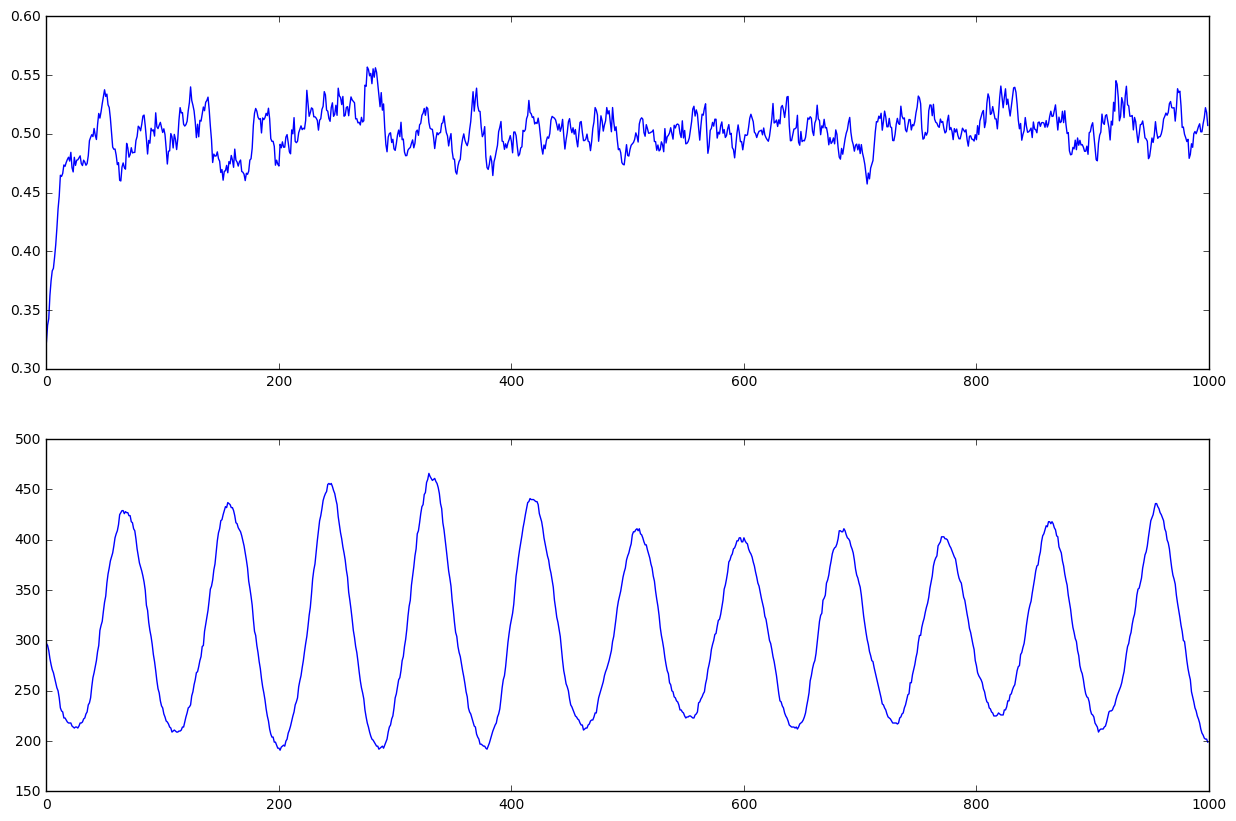

In [39]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.75")

0.49725063673 0.0104003936737


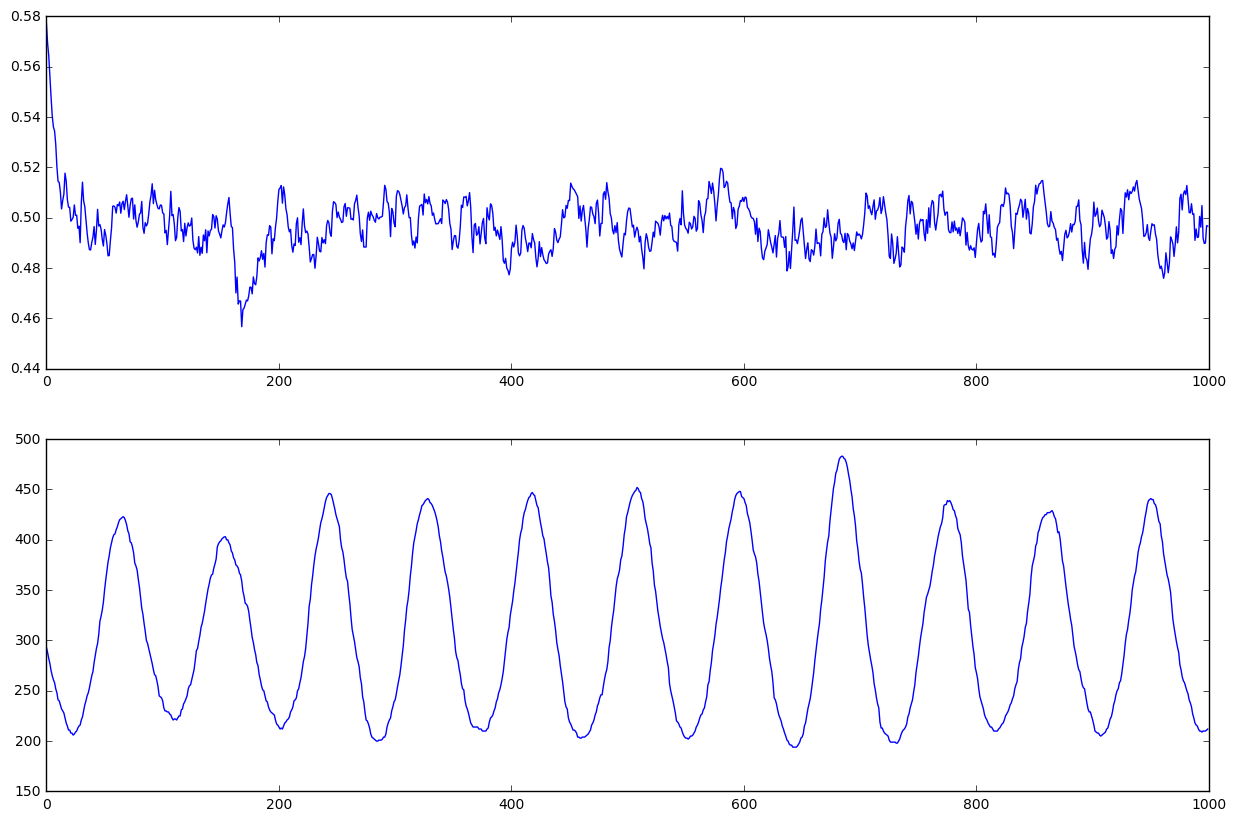

In [40]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-1.1")

0.495614745827 0.059516364955


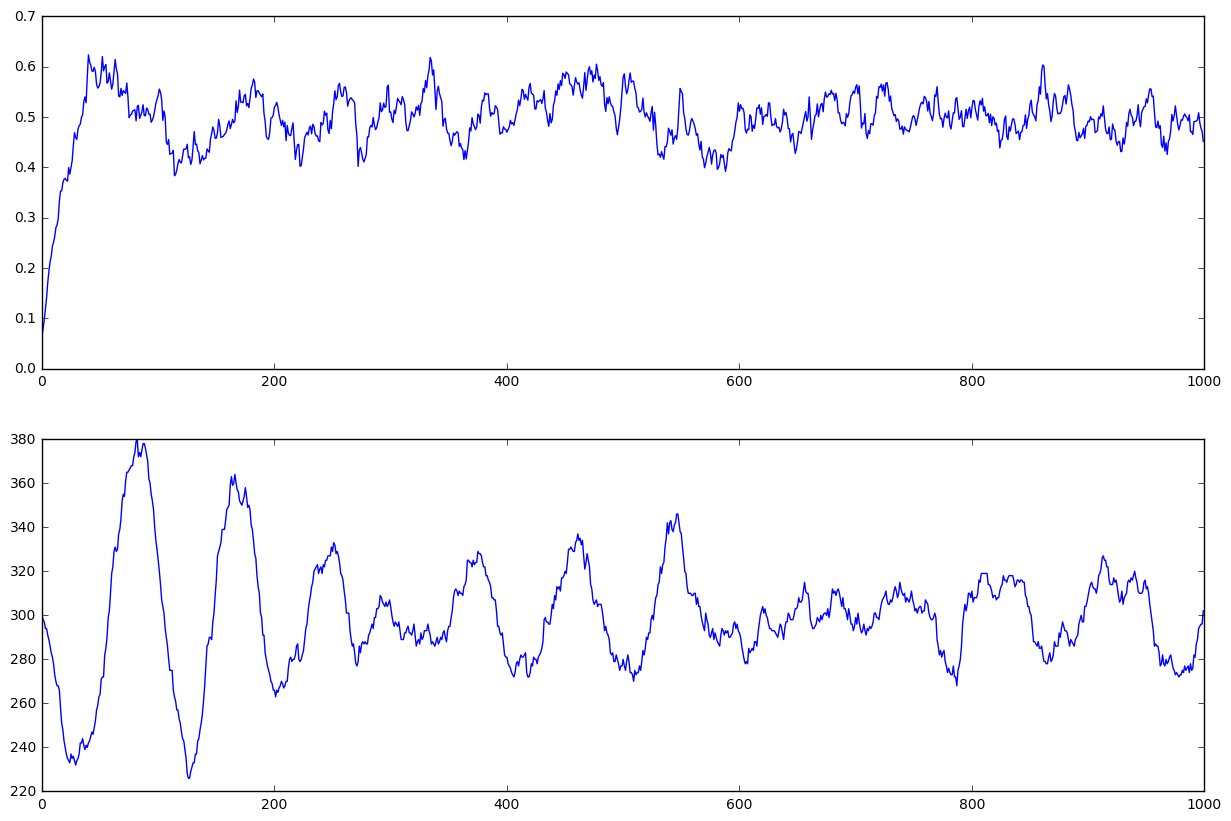

In [41]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.1")

0.501066478667 0.00508954140384


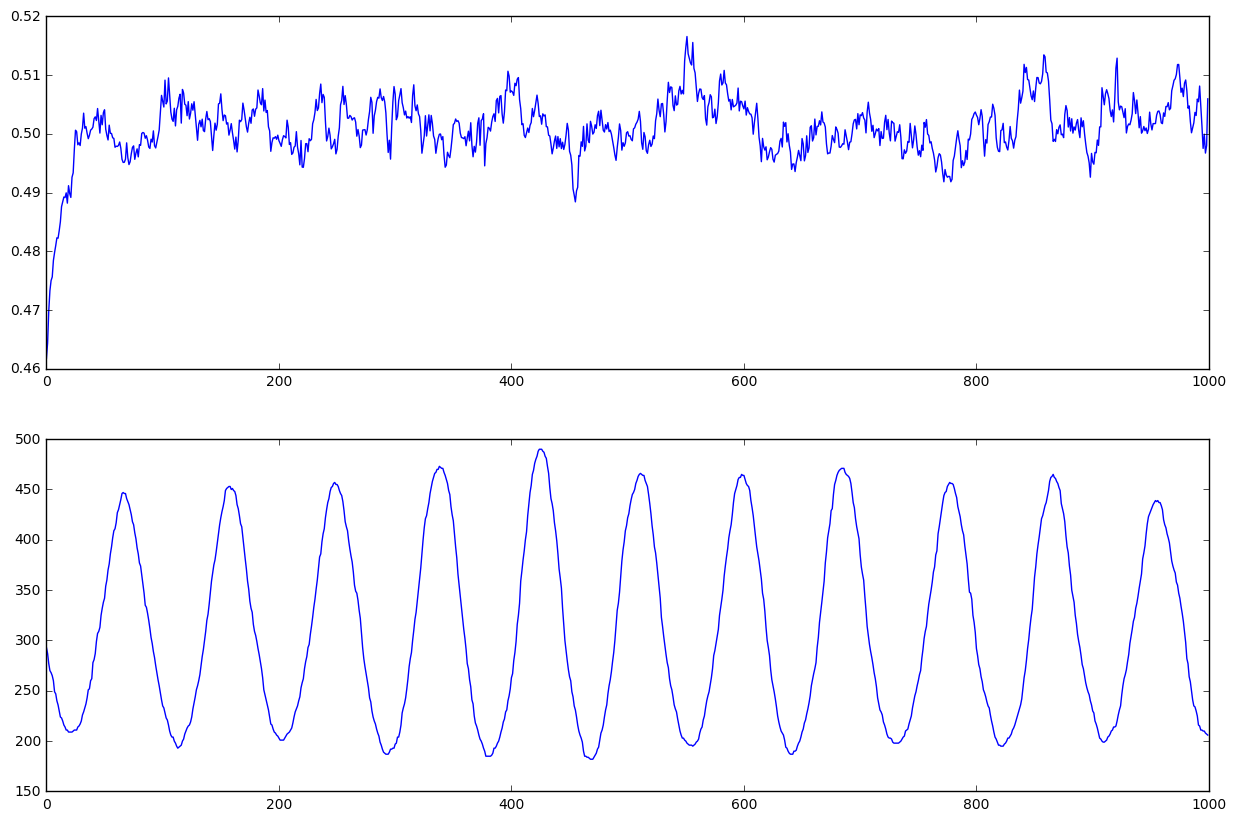

In [42]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.95")

0.496686673207 0.0300284765798


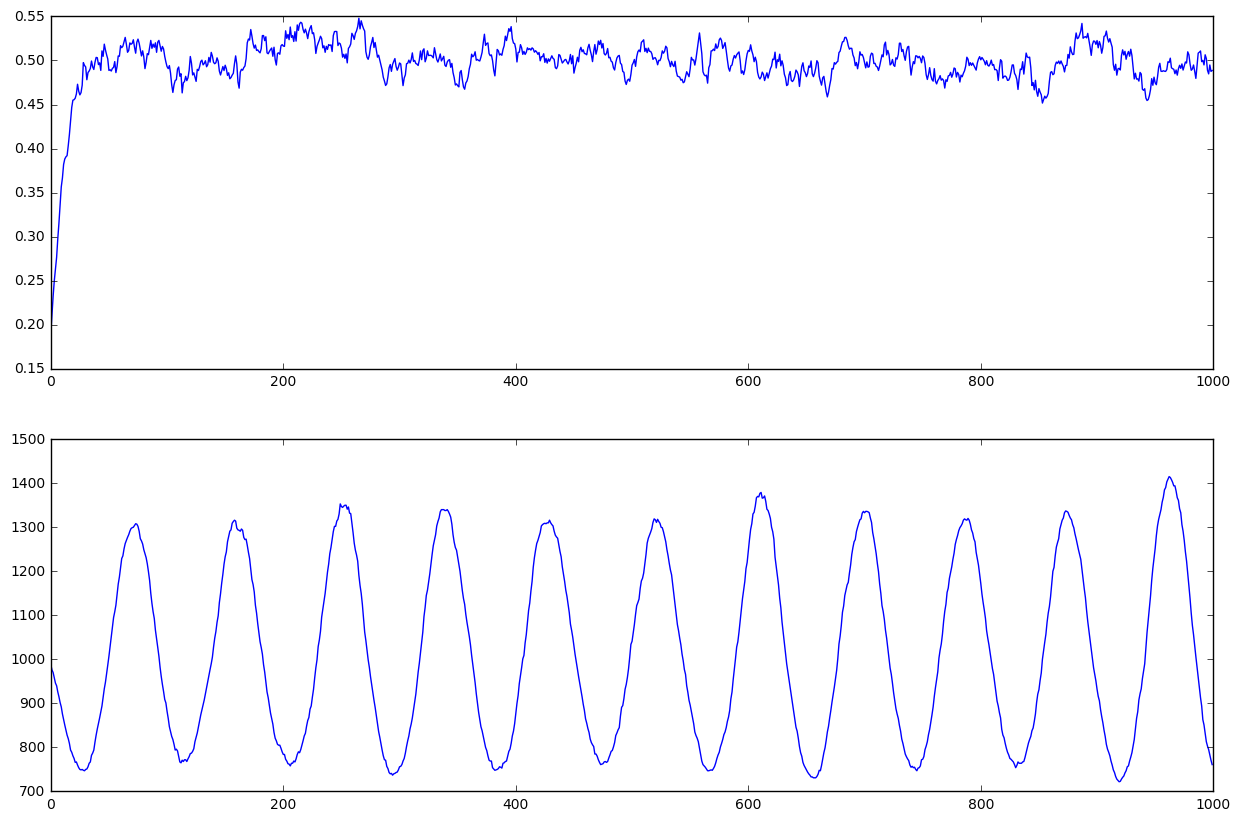

In [43]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.5")

0.497537428313 0.0259359879911


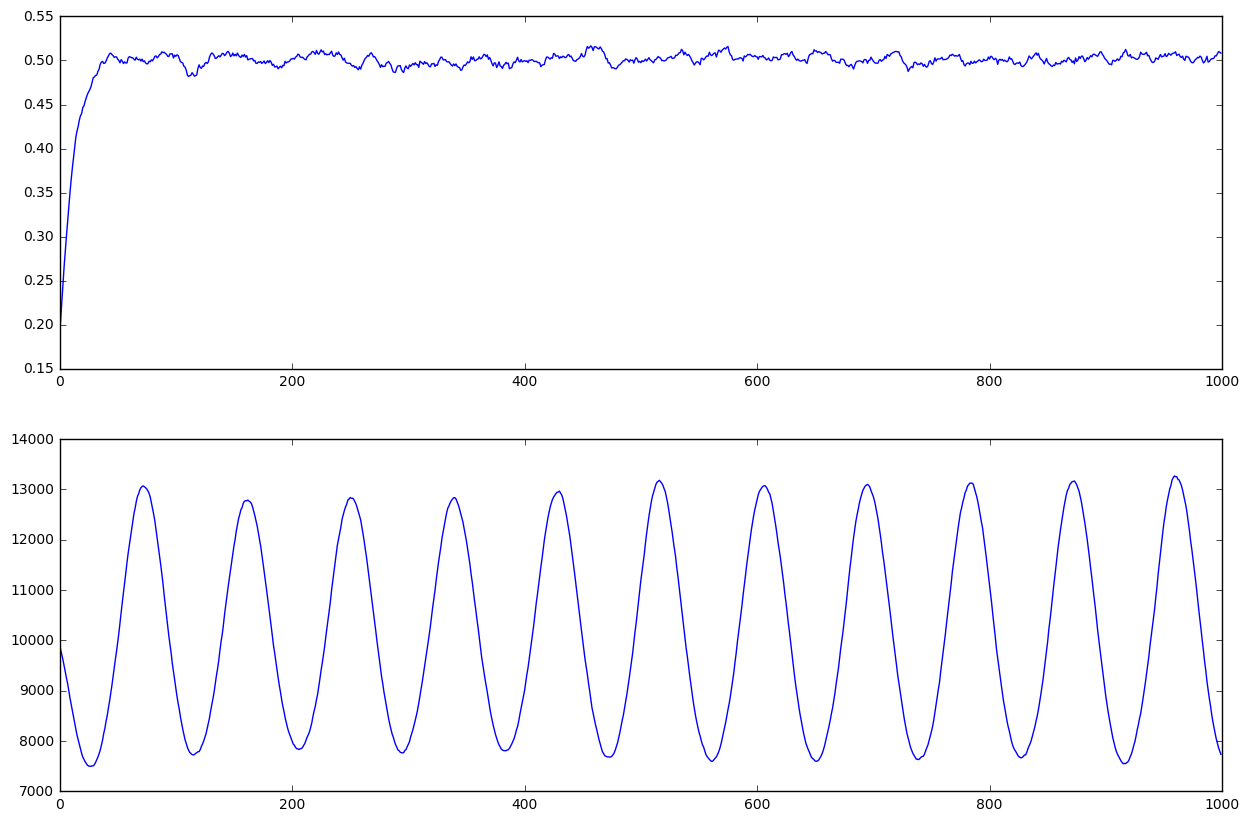

In [44]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.5-10000")

0.50101839111 0.00357463698007


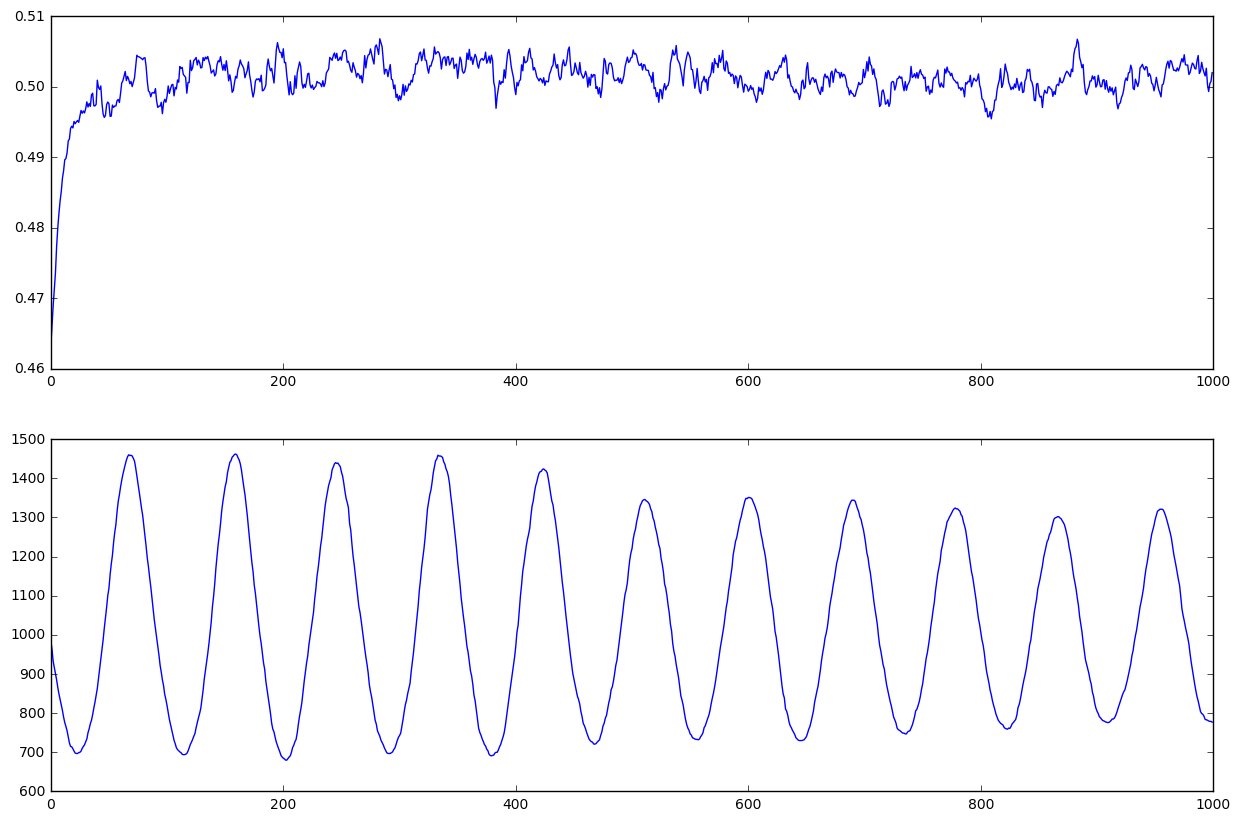

In [45]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0.95-1000")

0.500125965786 0.0440227431616


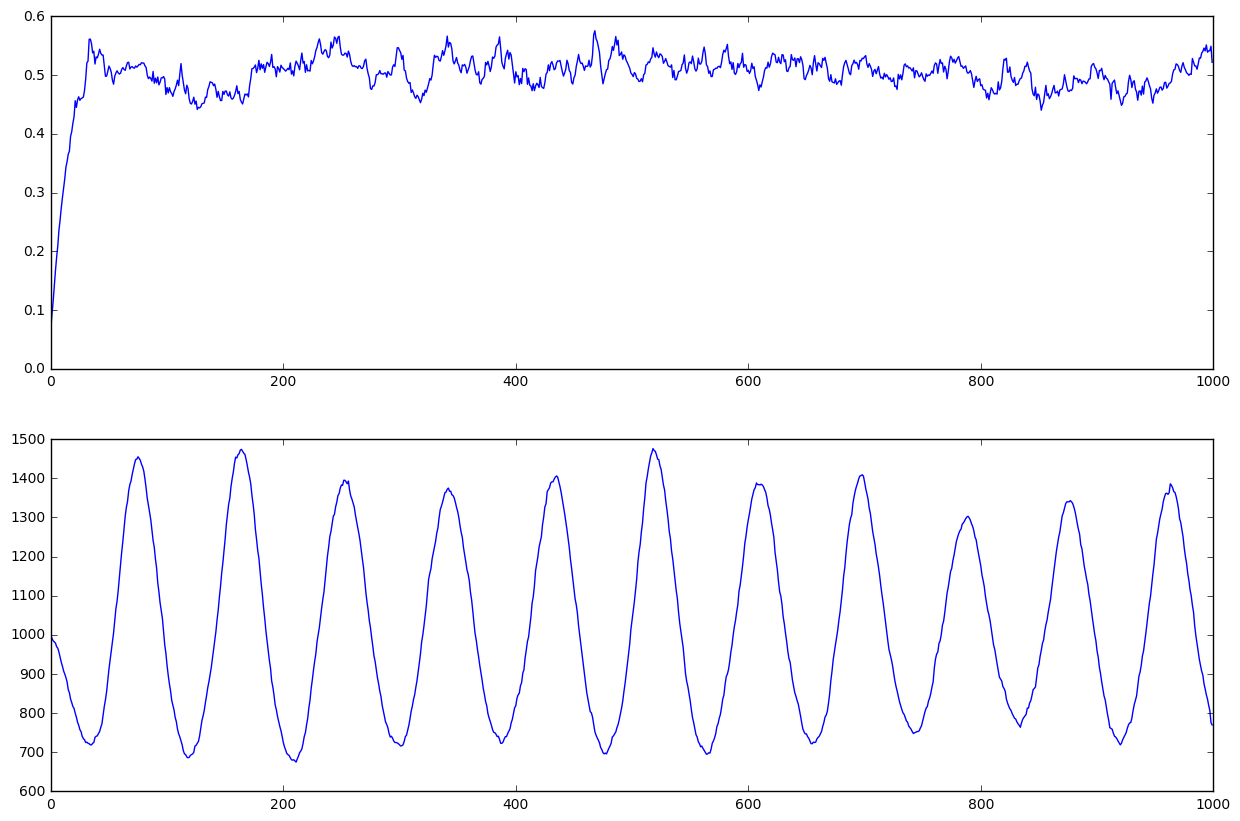

In [46]:
plot_energies("./dmc-harmonic-oscillator-python/numbers-0-1000")

0.4919994568 0.0438767353144


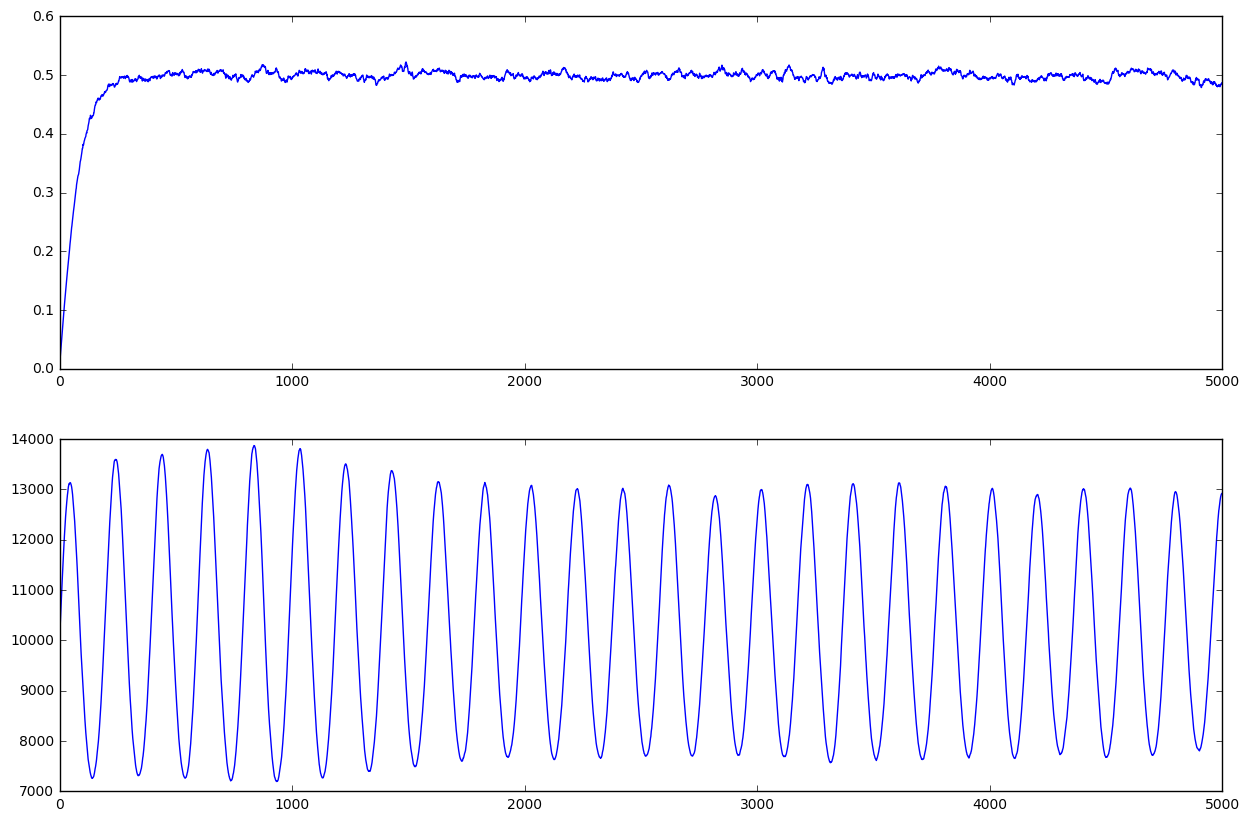

In [26]:
ee = plot_energies("./dmc-harmonic-oscillator-cuda/numbers")

In [27]:
ee[::-1]

array([ 0.48694 ,  0.485522,  0.484344, ...,  0.015083,  0.010029,
        0.004962])